# nbextension: `table of  contents (2)`

<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#nbextension:-table-of--contents-(2)" data-toc-modified-id="nbextension:-table-of--contents-(2)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>nbextension: <code>table of  contents (2)</code></a></span></li><li><span><a href="#css-styling" data-toc-modified-id="css-styling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>css-styling</a></span></li><li><span><a href="#nbextension:-excercise1+2" data-toc-modified-id="nbextension:-excercise1+2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>nbextension: <code>excercise1+2</code></a></span></li><li><span><a href="#%%tutor-magic" data-toc-modified-id="%%tutor-magic-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><code>%%tutor magic</code></a></span></li><li><span><a href="#nbextension:-Split-Cell-Notebook" data-toc-modified-id="nbextension:-Split-Cell-Notebook-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>nbextension: <code>Split Cell Notebook</code></a></span></li><li><span><a href="#ipywidgets" data-toc-modified-id="ipywidgets-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><code>ipywidgets</code></a></span><ul class="toc-item"><li><span><a href="#Stddev" data-toc-modified-id="Stddev-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Stddev</a></span></li><li><span><a href="#Interpolation" data-toc-modified-id="Interpolation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Interpolation</a></span></li></ul></li><li><span><a href="#gnuplot-kernel" data-toc-modified-id="gnuplot-kernel-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>gnuplot kernel</a></span></li></ul></div>

# css-styling

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("htwk_style.css", "r").read()
    return HTML(styles)
css_styling()

FileNotFoundError: [Errno 2] No such file or directory: 'htwk_style.css'

# nbextension: `excercise1+2`

**AUFGABE**

Plotte x=[1,2,3] und y=[2,3,4]

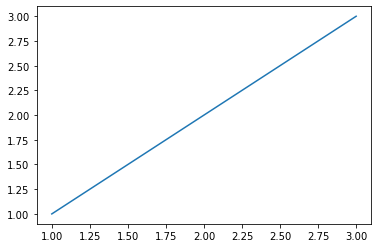

In [2]:
import matplotlib.pyplot as plt

x = [1,2,3]
y = [1,2,3]
plt.plot(x,y)

# `%%tutor magic`

Installation

`pip install metakernel`

In [3]:
from metakernel import register_ipython_magics
register_ipython_magics()

In [4]:
%%tutor

mylist = []

for i in range(10):
    mylist.append(i ** 2)

# nbextension: `Split Cell Notebook`

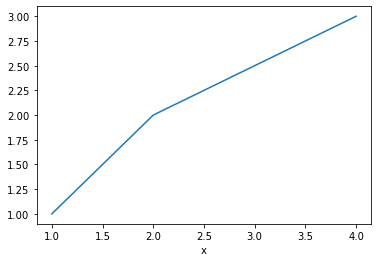

In [5]:
import matplotlib.pyplot as plt

x = [1,2,4]
y = [1,2,3]
fig , ax = plt.subplots()
ax.plot(x,y)  
ax.set_xlabel("x")
plt.show()

1.  `fig , ax = plt.subplots()` plot initiieren
2. auf `ax` plot ausführen

# `ipywidgets`

aus: https://github.com/kimfetti/Videos/blob/master/Shorts/standard_deviation_widget.ipynb

## Stddev

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

from ipywidgets import interactive, interact
from ipywidgets import FloatSlider

plt.rcParams['font.family'] = 'serif'

In [7]:
def stdev_widget(std_dev = 3):
    # Mean
    mu = 100
    
    # Bounds for line, +/- 3 standard deviations
    x = np.linspace(mu - 3*std_dev, mu + 3*std_dev, 100)
    
    # Random Points
    n = 100
    pts = np.random.normal(100, std_dev, size=n)
    pos = np.abs(np.random.normal(.1, .05, size=n))
    
    # Set up subplots
    f, (ax0, ax1) = plt.subplots(2, 1, figsize=(4, 5), gridspec_kw={'height_ratios': [3, 1]})
    
    # DENSITY PLOT
    ax0.plot(x, stats.norm.pdf(x, mu, std_dev), lw=3, zorder=3)
    ax0.fill_between(x, 0, stats.norm.pdf(x, mu, std_dev), alpha=0.2, zorder=2)
    
    # Add mean line
    ax0.axvline(100, ls='--', color='lightgray', zorder=1)
    ax0.text(101, 0.35, 'Mean', fontsize=12, color='gray', fontstyle='italic')
    
    # Formating for density plot
    ax0.set_xlim(80, 120)
    ax0.set_ylim(0, .4)
    ax0.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
    ax0.set_ylabel('Density', fontsize=12)
    sns.despine()

    # RANDOM SCATTER POINTS below density plot
    ax1.scatter(pts, pos, color='#606060')
    
    # Formating for scatter plot
    ax1.axis("off")
    ax1.set_xlim(80, 120)
    ax1.set_ylim(-0.05, .3)

In [8]:
style = {'description_width': 'initial'}

interact(stdev_widget, 
         std_dev=FloatSlider(value=3, 
                             min=1, 
                             max=5, 
                             step=0.5, 
                             description='Standard Deviation',
                             style=style
                            ));

interactive(children=(FloatSlider(value=3.0, description='Standard Deviation', max=5.0, min=1.0, step=0.5, sty…

## Interpolation

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline
from matplotlib.patches import Circle

from ipywidgets import interactive, interact
from ipywidgets import FloatSlider
from ipywidgets import IntSlider

fu_sim = pd.read_csv("fu.csv")

def extra_interpolation(endpoint = 15,order=1):

    fu_sim2 =fu_sim.loc[fu_sim["displacement [mm]"] <= endpoint,:]
    x = np.linspace(0, 20, 21)

    fig, ax = plt.subplots(figsize=(20/2,15/2))
    plt.grid(linewidth=0.25)
    ax.set_ylim([0, 15])
    ax.set_xlim([0, 20])
    ax.set_xlabel("Verschiebung [mm]")
    ax.set_ylabel("Kraft [N]")
    int_and_extrapolation = InterpolatedUnivariateSpline(fu_sim2["displacement [mm]"], fu_sim2["force [N]"], k=order)
    ax.plot(x,int_and_extrapolation(x),label="inter-/extrapolation", marker="s", markersize=3)
    ax.plot(fu_sim["displacement [mm]"],fu_sim["force [N]"],label="daten für inter-/extrapolation")
    ax.add_patch(Circle((endpoint,int_and_extrapolation(endpoint)), 0.2, alpha=0.5, color="red"));
    ax.legend()

    
style = {'description_width': 'initial'}

interact(extra_interpolation, 
         endpoint=IntSlider(value=15, 
                             min=1, 
                             max=15, 
                             step=1, 
                             description='Endpunkt',
                             style=style
                            ),
         order=IntSlider(value=1, 
                             min=1, 
                             max=5, 
                             step=1, 
                             description='Order',
                             style=style
                            ));

FileNotFoundError: [Errno 2] No such file or directory: 'fu.csv'

# gnuplot kernel

https://github.com/has2k1/gnuplot_kernel

[ ] zum laufen bringen

In [ ]:
# This loads the magics for gnuplot
%load_ext gnuplot_kernel

In [ ]:
x=[0,1,2,3]

In [ ]:
# inline plots for matplotlib
%matplotlib inline

# This loads the magics for gnuplot
%load_ext gnuplot_kernel

In [ ]:
%%gnuplot
plot sin(x)